**Harsha Somaya**

Spring 2023

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [2]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

-------------------------------
data/poly_data.csv (100x2)
Headers:
  X    Y    
-------------------------------
Showing first 5/100 rows.
2.147    11.382    
9.465    1.034    
4.52    20.251    
1.974    2.89    
-3.358    -6.809    

-------------------------------
71.81095284569933


Text(0, 0.5, 'y')

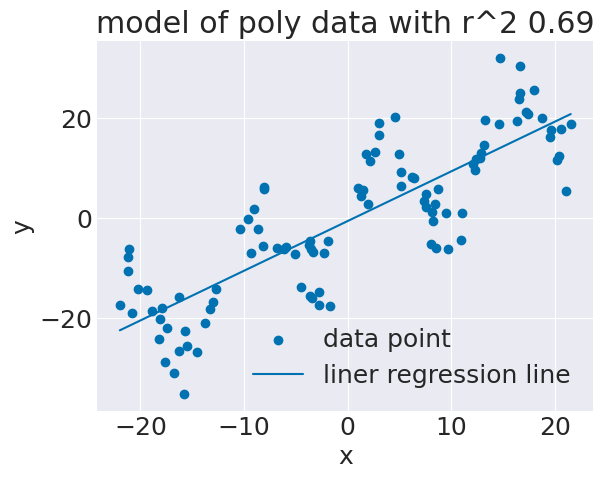

In [3]:
poly_filename = "data/poly_data.csv"
poly_data_object = data.Data(poly_filename)
print(poly_data_object)
poly_regression_object=linear_regression.LinearRegression(poly_data_object)
poly_regression_object.poly_regression(poly_data_object.get_headers()[0],poly_data_object.get_headers()[1],1 )
poly_regression_object.scatter(poly_data_object.get_headers()[0],poly_data_object.get_headers()[1], "model of poly data")
print(poly_regression_object.compute_mse())
plt.xlabel("x")
plt.ylabel("y")






#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

mse:  55.030880732781
r2:  0.7649333646369612


Text(0, 0.5, 'y')

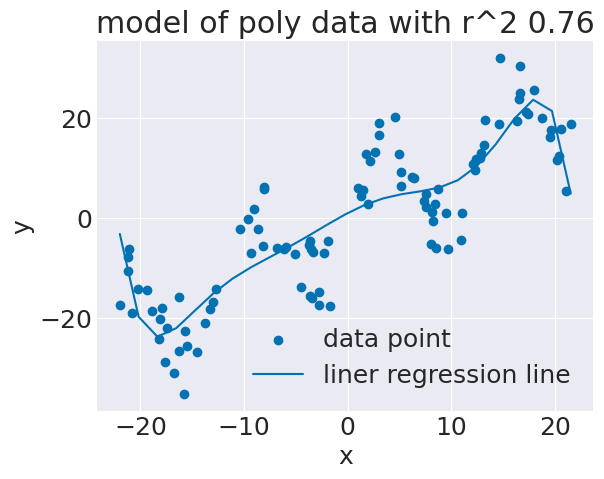

In [4]:
poly_filename = "data/poly_data.csv"
poly_data_object = data.Data(poly_filename)
poly_regression_object=linear_regression.LinearRegression(poly_data_object)
poly_regression_object.poly_regression(poly_data_object.get_headers()[0],poly_data_object.get_headers()[1],7 )
poly_regression_object.scatter(poly_data_object.get_headers()[0],poly_data_object.get_headers()[1], "model of poly data")
print("mse: ",poly_regression_object.compute_mse())
print("r2: ",poly_regression_object.get_r2())

plt.xlabel("x")
plt.ylabel("y")





**Question 4:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 5:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7.

**Answer 4:**
better because it goes through more of the points and the data is not exactly linear (sometimes the trend is negative, sometimes positive)

**Answer 5:**
visually: the data is more curve and less of a line

R2 gets closer to 1
mse decreases 


## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [5]:
data_fit_set = data.Data(poly_filename)
data_fit_set.limit_samples(0,50)
data_validation_set = data.Data(poly_filename)
data_validation_set.limit_samples(50,100)

poly_regression_fit=linear_regression.LinearRegression(data_fit_set)
poly_regression_set=linear_regression.LinearRegression(data_validation_set)
print(data_fit_set)
print(data_validation_set)


-------------------------------
data/poly_data.csv (50x2)
Headers:
  X    Y    
-------------------------------
Showing first 5/50 rows.
2.147    11.382    
9.465    1.034    
4.52    20.251    
1.974    2.89    
-3.358    -6.809    

-------------------------------
-------------------------------
data/poly_data.csv (50x2)
Headers:
  X    Y    
-------------------------------
Showing first 5/50 rows.
-3.65    -4.658    
9.69    -6.107    
-21.986    -17.271    
-8.694    -2.22    
-15.536    -25.608    

-------------------------------


Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

if line is so flexible it passes through every single y value 


just passes through points 


so 20 degree polynomials are not useful, only good for low # of degrees

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

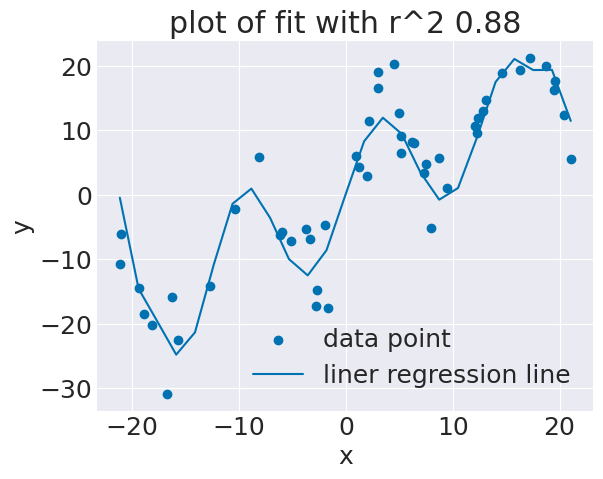

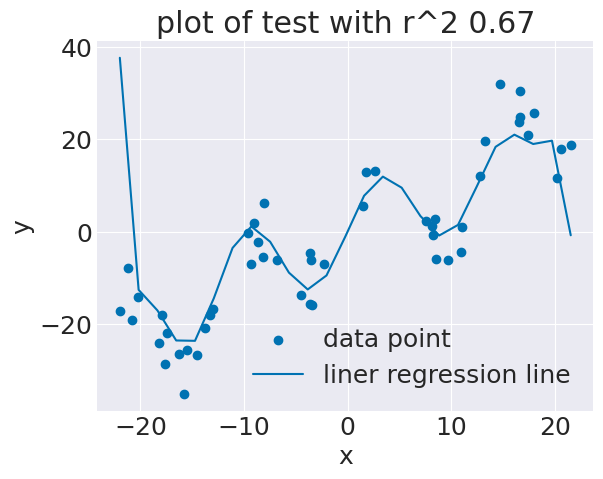

mse for fit data:  20.186168941026907
r2 for fit data:  0.8848556225298355
mse for tst data:  94.45198951756738
r2 for test data:  0.6656181804042638


In [6]:
import matplotlib.pyplot as plt
poly_regression_fit=linear_regression.LinearRegression(data_fit_set)
poly_regression_fit.poly_regression(data_fit_set.get_headers()[0], data_fit_set.get_headers()[1],12)
poly_regression_fit.scatter(data_fit_set.get_headers()[0], data_fit_set.get_headers()[1],"plot of fit")
plt.xlabel("x")
plt.ylabel("y")

plt.show()



slope=poly_regression_fit.get_fitted_slope()
intercept=poly_regression_fit.get_fitted_intercept()


poly_regression_set.initialize(data_validation_set.get_headers()[0],data_validation_set.get_headers()[1], slope, intercept,12)

poly_regression_set.scatter(data_validation_set.get_headers()[0], data_validation_set.get_headers()[1], title="plot of test")
plt.xlabel("x")
plt.ylabel("y")

plt.show()
print("mse for fit data: ", poly_regression_fit.compute_mse())
print("r2 for fit data: ", poly_regression_fit.get_r2())
print("mse for tst data: " ,poly_regression_set.compute_mse())
print("r2 for test data: ", poly_regression_set.get_r2())



#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

**Question 6:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 7:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 8:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 9:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 6:**

It does a good job since the test data and trian data are literallly from the same dataset of randomly generated x values in teh range of the given file's x values 

The test data uses the same coefficients as the train, so it does a good job 
**Answer 7:**


It imporves as you get closer to 7 but worsens the closer to 0. The r2 decreases and the mse increases for lower degrees

**Answer 8:**

degrees 5 to 6 because the r2 is close to 1, the mse is low, and there is no significnat difference beyond this rnage 

at degrees 4 and less, the r2 becomes in the .5-.69 range

**Answer 9:**

this one is hard to answer because there is no clear trend

for some degrees the r^2 increases and the mse decreases, menaing the fit may be better

for other degrees such as 13, the r^2 decreases, the mse increases, and the model only fits well to the training data, not the test data. It overfits, leading to poor mse and r^2. 





p=7
mse for fit data:  38.302581840518535
r2 for fit data:  0.7815173867606514
mse for tst data:  96.45877558766601
r2 for test data:  0.6585136950346449

p=11
mse for fit data:  14.425704205995974
r2 for fit data:  0.9177140181863731
mse for tst data:  85.12089105669689
r2 for test data:  0.6986524203192687


p=12
mse for fit data:  20.186168941026907
r2 for fit data:  0.8848556225298355
mse for tst data:  94.45198951756738
r2 for test data:  0.6656181804042638

p=13
mse for fit data:  48.55407685040328
r2 for fit data:  0.7230416049270516
mse for tst data:  218.424796280669
r2 for test data:  0.2267258614857054



Collaborators: Giang, Stephanie Taylor, yang, brian, Izzy Hurley	 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

Year
mse:  0.42611664170341773
r2:  0.9994032661998502


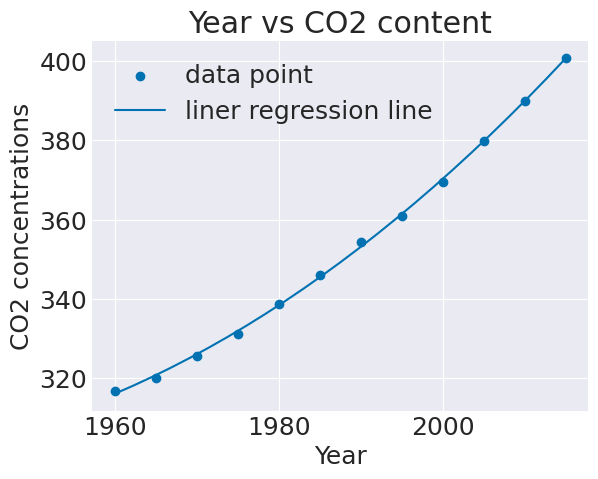

In [24]:
filename = "data/climate.csv"
# "data/poly_data.csv"
data_object = data.Data(filename)
print(data_object.get_headers()[0])
object=linear_regression.LinearRegression(data_object)
object.poly_regression(data_object.get_headers()[0],data_object.get_headers()[1],3 )
object.scatter(data_object.get_headers()[0],data_object.get_headers()[1], "plot")
plt.xlabel("Year")
plt.ylabel("CO2 concentrations")
plt.title("Year vs CO2 content")


print("mse: ",object.compute_mse())
print("r2: ",object.get_r2())






Hypthesis: as the years pass, there is more Co2 in the atmosphere 

The model is almost linear, with a low mse of 0.42611664170341773 and a high r2 of 0.9994032661998502

We have strong eveidence for a linear/degreee 3 (prabola trend) b/w year and co2 concetrations. It is increasing with time. We are not nessarily doing better or achieveing carbon neutrality 

fail to reject hypothesis




source: statkey


***extrapolate to other years***

will we achieve carbon neutrlaity by 2040 if we continue doing what we doing (use the same carbon slope and intercept: see code below)?

now going to extrapolate to years beyond 2015, will we achieve carbon neutrality where carbon out=carbon in or the leveling in carbon emissions?


x,  [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040]
y  [425.7703319150896, 428.189728171943, 430.62968862906564, 433.09012029503356, 435.570930178219, 438.0720252873434, 440.5933126308664, 443.13469921733486, 445.6960920553538, 448.277398153441, 450.8785245200852, 453.4993781639496, 456.13986609340645, 458.7998953172355, 461.47937284380896]
[[2026, 425.7703319150896], [2027, 428.189728171943], [2028, 430.62968862906564], [2029, 433.09012029503356], [2030, 435.570930178219], [2031, 438.0720252873434], [2032, 440.5933126308664], [2033, 443.13469921733486], [2034, 445.6960920553538], [2035, 448.277398153441], [2036, 450.8785245200852], [2037, 453.4993781639496], [2038, 456.13986609340645], [2039, 458.7998953172355], [2040, 461.47937284380896]]


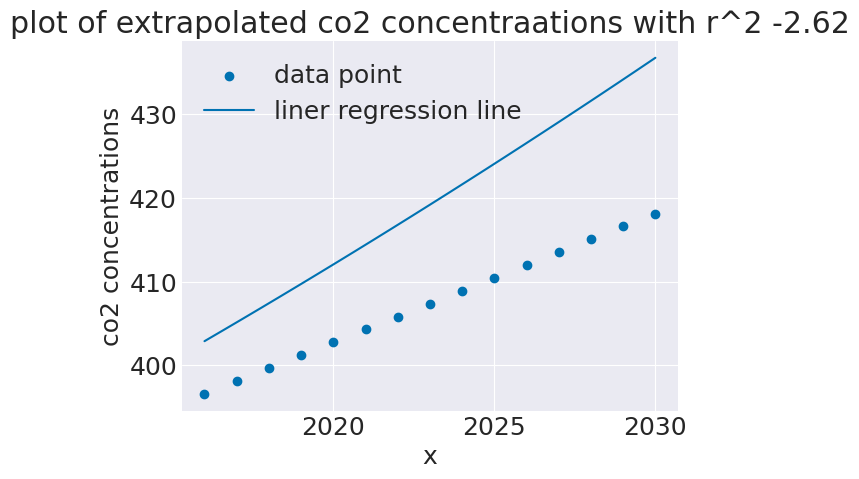

mse for orginal data:  0.42611664170341773
r2 for orginal data:  0.9994032661998502
mse for extrapolated data:  159.58990407683416
r2 for extrapolated data:  -2.6207653591579


In [28]:
import csv

carbon_slope=object.get_fitted_slope() #continue doing what we are doing, so use same slope and intercept as above
carbon_intercept=object.get_fitted_intercept()

data1 = data_object.get_all_data()
fit = np.polyfit(data1[:,0], data1[:,1] ,3) #The use of 1 signifies a linear fit.  used to extrapolate. last argument is degree to use. 

line = np.poly1d(fit) #use for y value generation
new_points = (np.arange(15)+2026) #form 2016 to 2040, x values
x=(new_points.tolist())
y=(line(new_points).tolist()) #y values

print("x, ", (x))
print("y ", (y))


new_lst=[]


for i in (range(len(x))):
     new_lst.append([x[i], y[i]])

print(new_lst) #list with x and y

#create csv file with x and y values
myFile = open('extrapolated.csv', 'w')
writer = csv.writer(myFile)
writer.writerow(['Year', 'Co2'])
writer.writerow(['numeric', 'numeric'])

for list in new_lst:
    writer.writerow(list)  
    

#move file into data directory 
extrapolated_filename = "data/extrapolated.csv"

#create objects  and plot extraploated data using given code
extrapolated_data_object = data.Data(extrapolated_filename)
ex_regression_object=linear_regression.LinearRegression(extrapolated_data_object)
ex_regression_object.initialize(extrapolated_data_object.get_headers()[0],extrapolated_data_object.get_headers()[1], carbon_slope, carbon_intercept,3)

ex_regression_object.scatter(extrapolated_data_object.get_headers()[0], extrapolated_data_object.get_headers()[1], title="plot of extrapolated co2 concentraations")
plt.xlabel("x")
plt.ylabel("co2 concentrations")

plt.show()
print("mse for orginal data: ", object.compute_mse())
print("r2 for orginal data: ", object.get_r2())
print("mse for extrapolated data: " ,ex_regression_object.compute_mse())
print("r2 for extrapolated data: ", ex_regression_object.get_r2())






**For my extension, I tried extraploating my data from year 2016 to 2040. I used the np.polyfit and np.poly1d to create the y values. The extrapolated x and y values were then used to make a new file. Then, the extrapolated data was plotted. The orginal data is plotted too for the first extension. The orginal data and extrapolated data graph both do not have carbon concentrations leveling (slope does not equal 0), so we are not close to achieving the goal fo carbon neutrality. A 3rd degree polynomial was used for my extension, but any can be used as long as the orginal data polynomial degree matches the extrapolated one in np.polyfit.**

**I also used a different method for linear regression algorithm, the np.polyfit one, which does not seem to work the best**

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.